https://www.youtube.com/watch?v=PaCmpygFfXo&ab_channel=AndrejKarpathy

In [150]:
words = open('data/names', 'r').read().lower().splitlines()
for i, w in enumerate(words):
    words[i] = w.replace('-', '').replace(' ', '').replace("'", '')

In [151]:
len(words)

7944

In [152]:
words[::500]

['abagael',
 'benedetta',
 'claresta',
 'eilis',
 'glory',
 'jonell',
 'liliane',
 'melody',
 'prissie',
 'stacy',
 'geeta',
 'clinten',
 'giovanne',
 'lawerence',
 'piggy',
 'tann']

In [153]:
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [154]:
min(len(w) for w in words), max(len(w) for w in words)

(2, 14)

In [155]:
b = {}
for w in words:
    chs = ['<b>'] + list(w) + ['<e>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [156]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('e', '<e>'), 1901),
 (('a', '<e>'), 1802),
 (('a', 'n'), 1044),
 (('a', 'r'), 950),
 (('e', 'l'), 880),
 (('n', '<e>'), 864),
 (('r', 'i'), 813),
 (('i', 'n'), 798),
 (('y', '<e>'), 793),
 (('e', 'r'), 733),
 (('n', 'e'), 708),
 (('i', 'e'), 700),
 (('l', 'e'), 698),
 (('<b>', 'm'), 684),
 (('l', 'i'), 676),
 (('<b>', 'a'), 656),
 (('<b>', 'c'), 635),
 (('n', 'a'), 633),
 (('e', 'n'), 588),
 (('l', 'l'), 552),
 (('<b>', 's'), 547),
 (('o', 'r'), 528),
 (('m', 'a'), 524),
 (('a', 'l'), 519),
 (('l', 'a'), 505),
 (('r', 'e'), 490),
 (('r', 'a'), 487),
 (('n', 'n'), 477),
 (('o', 'n'), 462),
 (('<b>', 'd'), 454),
 (('<b>', 'r'), 447),
 (('<b>', 'l'), 445),
 (('<b>', 'j'), 437),
 (('i', 'a'), 422),
 (('<b>', 'b'), 419),
 (('h', 'a'), 414),
 (('i', 'l'), 411),
 (('t', 'a'), 393),
 (('<b>', 't'), 386),
 (('<b>', 'e'), 370),
 (('<b>', 'g'), 369),
 (('i', '<e>'), 367),
 (('l', '<e>'), 366),
 (('i', 's'), 366),
 (('h', 'e'), 364),
 (('n', 'i'), 364),
 (('e', 't'), 347),
 (('<b>', 'k'), 346),

In [157]:
import torch

In [158]:
N = torch.zeros((len(chars) + 1, len(chars) + 1), dtype=torch.int32)
N.size()

torch.Size([27, 27])

In [159]:
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

In [160]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [161]:
import matplotlib.pyplot as plt

(-0.5, 26.5, 26.5, -0.5)

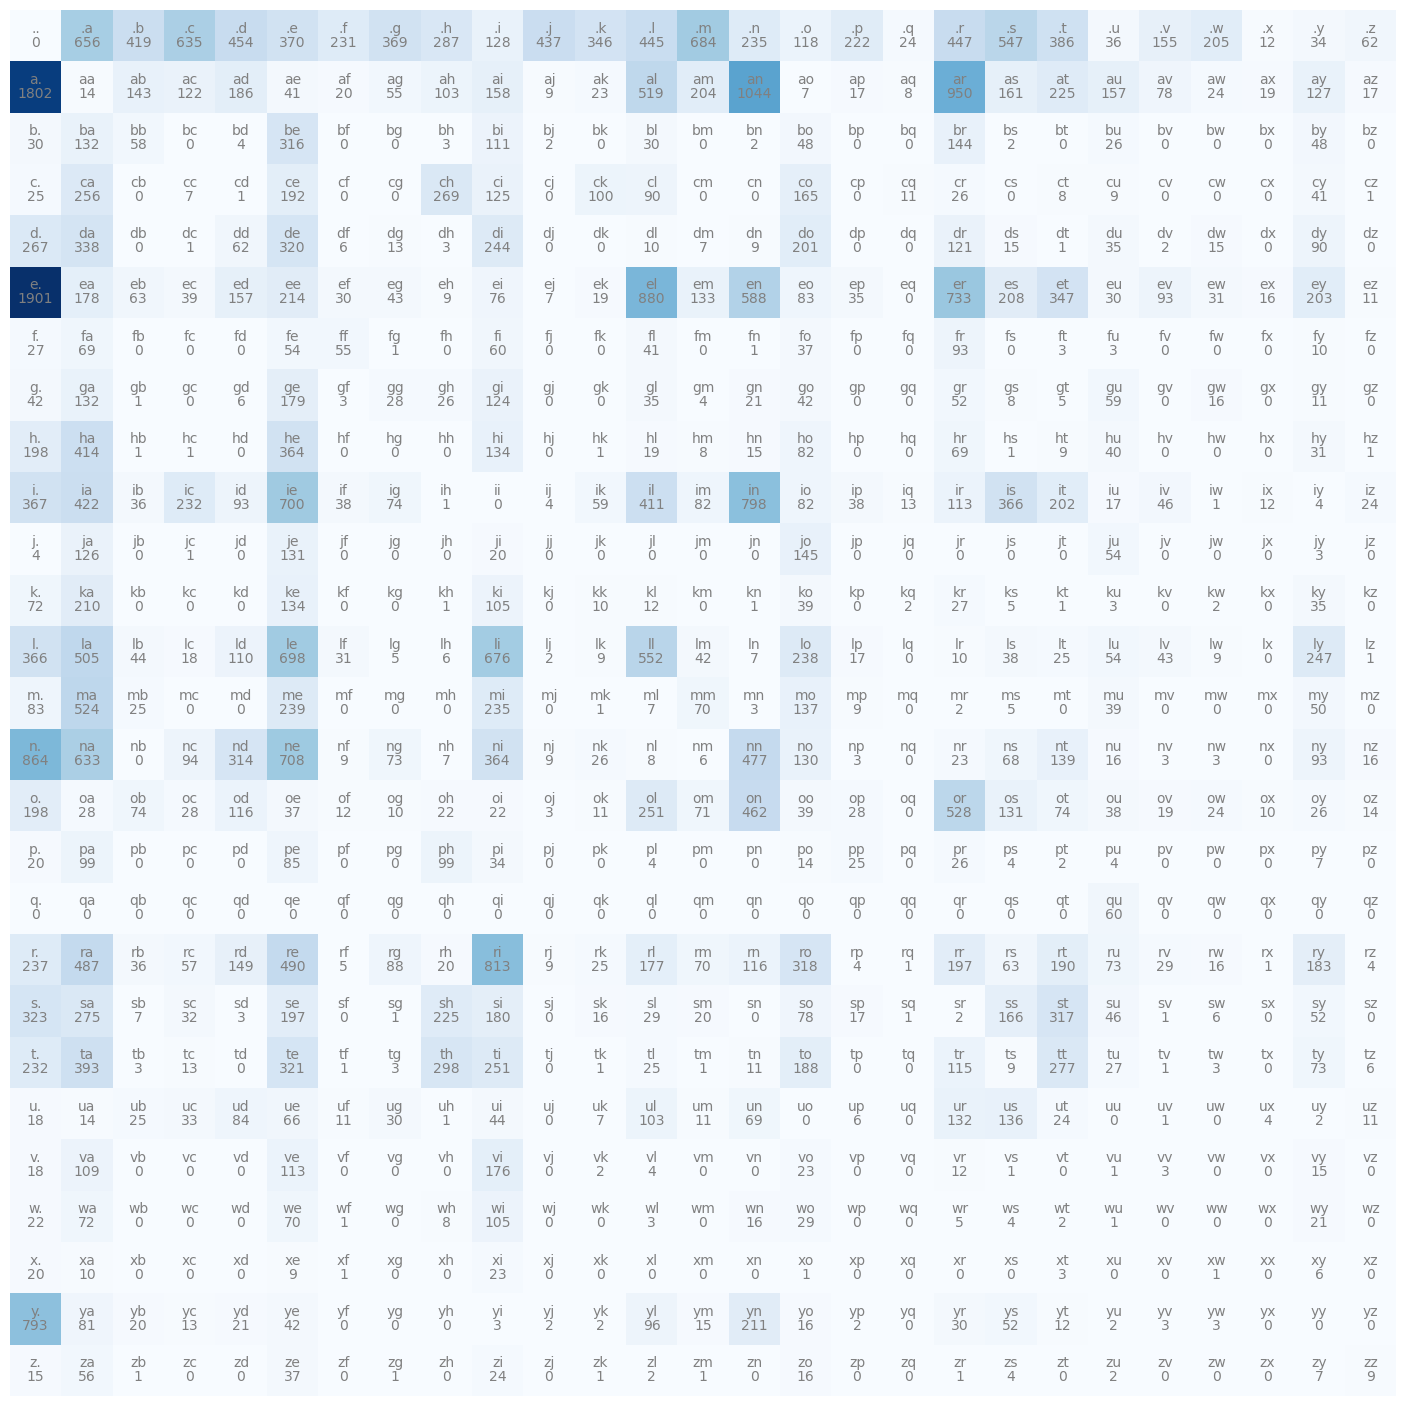

In [162]:
plt.figure(figsize=(18, 18))
plt.imshow(N, cmap='Blues')
for i in range(len(itos)):
    for j in range(len(itos)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [163]:
N[0]

tensor([  0, 656, 419, 635, 454, 370, 231, 369, 287, 128, 437, 346, 445, 684,
        235, 118, 222,  24, 447, 547, 386,  36, 155, 205,  12,  34,  62],
       dtype=torch.int32)

In [164]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0826, 0.0527, 0.0799, 0.0572, 0.0466, 0.0291, 0.0465, 0.0361,
        0.0161, 0.0550, 0.0436, 0.0560, 0.0861, 0.0296, 0.0149, 0.0279, 0.0030,
        0.0563, 0.0689, 0.0486, 0.0045, 0.0195, 0.0258, 0.0015, 0.0043, 0.0078])

In [165]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [166]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p 

tensor([0.6064, 0.3033, 0.0903])

In [167]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [168]:
P = (N + 1).float() # smoothing the counts in order to don't get the inf loglikelihood (the more we add, the more uniform out model be )
P /= P.sum(1, keepdim=True)

In [169]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        # p = torch.ones(len(itos)) / len(itos) # uniform distribution
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break    
    print(''.join(out))

junide.
canasar.
p.
clay.
a.


In [170]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [171]:
loglikelihood = .0
n = 0

for w in words:
# for w in ['denisq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        loglikelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{loglikelihood=}')        
nll = -loglikelihood
print(f'{nll=}')
print(f'{nll/n=}')

loglikelihood=tensor(-134239.7188)
nll=tensor(134239.7188)
nll/n=tensor(2.4045)


In [172]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

ys = torch.tensor(ys)
xs = torch.tensor(xs)

In [173]:
xs

tensor([ 0,  1,  2,  1,  7,  1,  5, 12])

In [174]:
ys

tensor([ 1,  2,  1,  7,  1,  5, 12,  0])

In [175]:
import torch.nn.functional as F

In [176]:
xenc = F.one_hot(xs, num_classes=len(stoi)).float()
xenc.size()

torch.Size([8, 27])

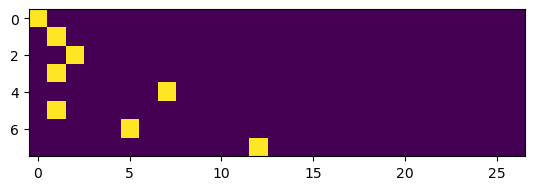

In [177]:
plt.imshow(xenc)

In [178]:
xenc.dtype

torch.float32

In [179]:
W = torch.randn(size=(27, 27))
xenc @ W

tensor([[-1.1654,  0.3114,  0.0395, -0.0477,  0.3621,  1.6783, -0.7094, -2.5255,
          0.5869,  1.1793, -0.9399, -2.6477,  1.0480, -0.3780,  0.2336, -0.0325,
         -0.7445, -0.5485, -0.7792,  0.1957, -1.1309, -1.9815,  0.7045, -0.7305,
          0.2195, -0.1592, -0.5870],
        [-0.5798, -0.5774, -0.0543,  0.1282, -1.2119,  0.5582,  0.1840,  0.1041,
         -0.5672, -1.2215, -1.6571, -0.2490, -0.8558, -0.9153, -0.3480,  0.9810,
          0.2273,  0.4612,  1.5124,  0.1772, -0.0883, -1.1844,  0.8915, -0.1100,
          0.4965, -0.5361,  0.5241],
        [-0.5726, -1.5454, -1.3094, -1.6251,  1.8867, -0.3331,  0.0232,  0.2545,
          2.3645, -0.1171, -1.5639,  2.4090,  0.0874, -1.1960,  1.1310,  0.4396,
          0.7477,  0.1884, -0.9951,  0.6380, -0.9922, -1.5768, -0.6892, -0.4463,
         -0.1687,  0.3697,  0.9804],
        [-0.5798, -0.5774, -0.0543,  0.1282, -1.2119,  0.5582,  0.1840,  0.1041,
         -0.5672, -1.2215, -1.6571, -0.2490, -0.8558, -0.9153, -0.3480,  0.9810

In [180]:
(xenc @ W).size()

torch.Size([8, 27])

In [181]:
# (8, 27) @ (27, 27) -> (8, 27)

In [182]:
# we interpret the output 27-dim vector from out linear layer as log counts
# so in order to get the counts we need to exp it

In [183]:
logits = xenc @ W # log-counts (logits)
counts = logits.exp() # equivalent N
probs = counts / counts.sum(dim=1, keepdim=True)
probs

tensor([[0.0102, 0.0445, 0.0339, 0.0311, 0.0468, 0.1747, 0.0160, 0.0026, 0.0587,
         0.1061, 0.0127, 0.0023, 0.0930, 0.0223, 0.0412, 0.0316, 0.0155, 0.0188,
         0.0150, 0.0397, 0.0105, 0.0045, 0.0660, 0.0157, 0.0406, 0.0278, 0.0181],
        [0.0183, 0.0183, 0.0309, 0.0371, 0.0097, 0.0570, 0.0392, 0.0362, 0.0185,
         0.0096, 0.0062, 0.0254, 0.0139, 0.0131, 0.0230, 0.0870, 0.0410, 0.0518,
         0.1481, 0.0390, 0.0299, 0.0100, 0.0796, 0.0292, 0.0536, 0.0191, 0.0551],
        [0.0108, 0.0041, 0.0052, 0.0038, 0.1268, 0.0138, 0.0197, 0.0248, 0.2045,
         0.0171, 0.0040, 0.2138, 0.0210, 0.0058, 0.0595, 0.0298, 0.0406, 0.0232,
         0.0071, 0.0364, 0.0071, 0.0040, 0.0096, 0.0123, 0.0162, 0.0278, 0.0512],
        [0.0183, 0.0183, 0.0309, 0.0371, 0.0097, 0.0570, 0.0392, 0.0362, 0.0185,
         0.0096, 0.0062, 0.0254, 0.0139, 0.0131, 0.0230, 0.0870, 0.0410, 0.0518,
         0.1481, 0.0390, 0.0299, 0.0100, 0.0796, 0.0292, 0.0536, 0.0191, 0.0551],
        [0.0263, 0.0107,

In [184]:
probs.size()

torch.Size([8, 27])

In [185]:
# SUMMARY ------------------------------>>>>

In [186]:
xs

tensor([ 0,  1,  2,  1,  7,  1,  5, 12])

In [187]:
ys

tensor([ 1,  2,  1,  7,  1,  5, 12,  0])

In [188]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [189]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N 
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [190]:
probs.shape

torch.Size([8, 27])

In [191]:

nlls = torch.zeros(8)
for i in range(8):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .a (indexes 0,1)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 1
probability assigned by the net to the the correct character: 0.009982486255466938
log likelihood: -4.6069231033325195
negative log likelihood: 4.6069231033325195
--------
bigram example 2: ab (indexes 1,2)
input to the neural net: 1
output probabilities from the neural net: tensor([0.0150, 0.0086, 0.0396, 0.0100, 0.0606, 0.0308, 0.1084, 0.0131, 0.0125,
        0.0048, 0.1024, 0.0086, 0.0988, 0.0112, 0.0232, 0.0207, 0.0408, 0.0078,
        0.0899, 0.0531, 0.0463, 0.0309, 0.0051, 0.0329, 0.0654, 0.0503, 0.0091])
label (actual next character): 2
probability assigned by the net to the the correct character: 0

In [192]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [193]:
xs

tensor([ 0,  1,  2,  1,  7,  1,  5, 12])

In [194]:
ys

tensor([ 1,  2,  1,  7,  1,  5, 12,  0])

In [195]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [196]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

In [121]:
probs[0, 1], probs[1, 2], probs[2, 1], probs[3, 7], probs[4, 1], probs[5, 5], probs[6, 12], probs[7, 0]

(tensor(0.0100),
 tensor(0.0396),
 tensor(0.0079),
 tensor(0.0131),
 tensor(0.0194),
 tensor(0.0308),
 tensor(0.0115),
 tensor(0.0107))

In [197]:
torch.arange(8)

tensor([0, 1, 2, 3, 4, 5, 6, 7])

In [198]:
probs[torch.arange(8), ys]

tensor([0.0100, 0.0396, 0.0079, 0.0131, 0.0194, 0.0308, 0.0115, 0.0107],
       grad_fn=<IndexBackward0>)

In [199]:
loss = -probs[torch.arange(8), ys].log().mean()
loss

tensor(4.1803, grad_fn=<NegBackward0>)

In [200]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(8), ys].log().mean()

In [201]:
print(loss.item())

4.180294513702393


In [202]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [203]:
W.size(), W.grad.size()

(torch.Size([27, 27]), torch.Size([27, 27]))

In [204]:
W.data += -0.1 * W.grad

In [205]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [213]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  55829


In [214]:
# gradient descent
for k in range(250):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

3.7938904762268066
3.3785290718078613
3.1495063304901123
3.0103964805603027
2.9135823249816895
2.843428134918213
2.7902944087982178
2.7483763694763184
2.714177370071411
2.6855602264404297
2.6612279415130615
2.640352725982666
2.6223433017730713
2.60673189163208
2.5931267738342285
2.581195831298828
2.5706610679626465
2.5612943172454834
2.552913188934326
2.5453693866729736
2.538545608520508
2.532346725463867
2.5266940593719482
2.521523952484131
2.5167806148529053
2.512417793273926
2.508395195007324
2.504678726196289
2.5012364387512207
2.4980428218841553
2.495074510574341
2.492309808731079
2.4897308349609375
2.487321376800537
2.4850666522979736
2.482952833175659
2.4809694290161133
2.479104518890381
2.477349281311035
2.4756951332092285
2.4741339683532715
2.472658395767212
2.4712624549865723
2.469939947128296
2.468686580657959
2.467496395111084
2.4663655757904053
2.46528959274292
2.4642651081085205
2.4632885456085205
2.4623568058013916
2.4614670276641846
2.46061635017395
2.4598028659820557
2

In [ ]:
# note: the gradient-based framework has equivalent for smoothing (which we encounter in freqent-based approach)
# so the temperature in softmax is the equivalent to the zeroing the values in W matrix
# and this bring us to the regularization!!!

In [215]:
(W**2).sum() # or (W**2).mean()

tensor(1512.7380, grad_fn=<SumBackward0>)

In [217]:
# gradient descent
for k in range(10):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

2.4319372177124023
2.4319357872009277
2.431934356689453
2.4319324493408203
2.4319307804107666
2.431929111480713
2.431927442550659
2.4319257736206055
2.4319241046905518
2.431922435760498


In [220]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    # p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
canasar.
p.
clay.
a.
